In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from numpy.random import RandomState

_PRNG = RandomState(0)

In [2]:
_FILE_ORIGINAL_DATASET="data/LoanStats_2018Q3.csv"

df = pd.read_csv(_FILE_ORIGINAL_DATASET)

C:\Users\juszhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.97%,507.55,D,D1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000,60 months,13.56%,576.02,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000,36 months,18.94%,1098.78,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6000,6000,6000,36 months,7.84%,187.58,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10650,10650,10650,36 months,7.84%,332.95,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [5]:
blank_columns = [col for col in df.columns if all(df[col].isnull())]
blank_columns

['id', 'member_id', 'url', 'desc']

In [6]:
df.drop(columns=blank_columns, inplace=True)

In [7]:
loan_by_grade = df["grade"].value_counts().to_dict()
loan_by_grade

{'A': 37381,
 'B': 34776,
 'C': 31573,
 'D': 18053,
 'E': 4956,
 'F': 1183,
 'G': 272}

In [8]:
loan_by_sub_grade = df["sub_grade"].value_counts().to_dict()
loan_by_sub_grade

{'A1': 9472,
 'B4': 8229,
 'A4': 7968,
 'B2': 7378,
 'A5': 7169,
 'C1': 7044,
 'B1': 6821,
 'A3': 6678,
 'C3': 6631,
 'B5': 6625,
 'C2': 6144,
 'A2': 6094,
 'C4': 5957,
 'C5': 5797,
 'B3': 5723,
 'D1': 4263,
 'D2': 4073,
 'D3': 3551,
 'D4': 3133,
 'D5': 3033,
 'E5': 1251,
 'E1': 1011,
 'E3': 969,
 'E2': 912,
 'E4': 813,
 'F1': 470,
 'F2': 266,
 'F3': 194,
 'G1': 185,
 'F5': 129,
 'F4': 124,
 'G2': 39,
 'G3': 24,
 'G5': 15,
 'G4': 9}

In [9]:
sorted_grade = np.argsort(list(loan_by_grade.keys()))

grade = np.array(list(loan_by_grade.keys()))
grade_count = np.array(list(loan_by_grade.values()))

grade_count[sorted_grade]

array([37381, 34776, 31573, 18053,  4956,  1183,   272])

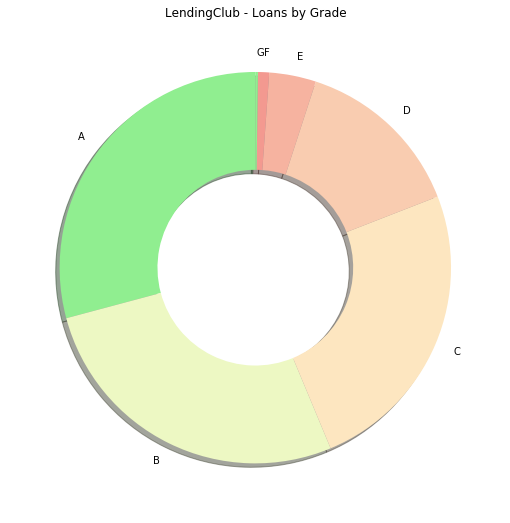

In [10]:
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap


plt.figure(figsize=(16,9))

vmin = 0
vmax = len(loan_by_grade) - 1

_NORMALIZE = Normalize(vmin=vmin, vmax=vmax)
custom_color_range = [[_NORMALIZE(vmin), "lightgreen"],
                      [_NORMALIZE(vmax/5), "lemonchiffon"],
                      [_NORMALIZE(vmax), "lightcoral"]]

# _COLORMAP = plt.cm.ScalarMappable(cmap=plt.cm.Wistia)
_COLORMAP = LinearSegmentedColormap.from_list("", custom_color_range, N=vmax+1)

colors = _COLORMAP(list(range(0, vmax)))
# lightcoral
# lightgreen

plt.pie(grade_count[sorted_grade], labels=grade[sorted_grade], wedgeprops=dict(width=0.5), colors=colors, startangle=90, shadow=True)
plt.title("LendingClub - Loans by Grade")

plt.show()

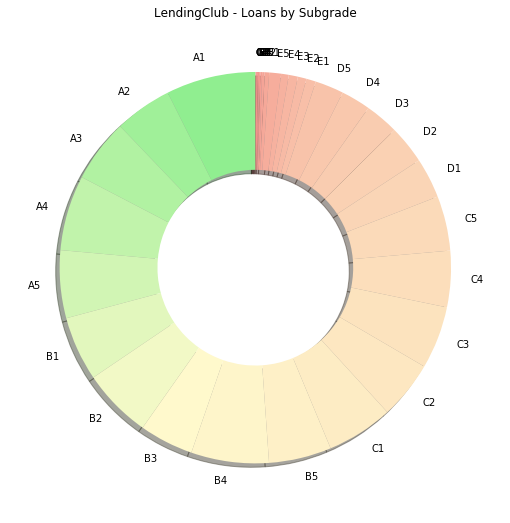

In [11]:
sorted_sub_grade = np.argsort(list(loan_by_sub_grade.keys()))

sub_grade = np.array(list(loan_by_sub_grade.keys()))
sub_grade_count = np.array(list(loan_by_sub_grade.values()))



plt.figure(figsize=(16,9))

vmin = 0
vmax = len(loan_by_sub_grade) - 1

_NORMALIZE = Normalize(vmin=vmin, vmax=vmax)
custom_color_range = [[_NORMALIZE(vmin), "lightgreen"],
                      [_NORMALIZE(vmax/5), "lemonchiffon"],
                      [_NORMALIZE(vmax), "lightcoral"]]

# _COLORMAP = plt.cm.ScalarMappable(cmap=plt.cm.Wistia)
_COLORMAP = LinearSegmentedColormap.from_list("", custom_color_range, N=vmax+1)

colors = _COLORMAP(list(range(0, vmax)))
# lightcoral
# lightgreen

plt.pie(sub_grade_count[sorted_sub_grade], labels=sub_grade[sorted_sub_grade], wedgeprops=dict(width=0.5), colors=colors, startangle=90, shadow=True)
plt.title("LendingClub - Loans by Subgrade")

plt.show()

In [12]:
df["loan_status"].value_counts()

Current               121082
Fully Paid              4786
In Grace Period          948
Late (31-120 days)       920
Late (16-30 days)        348
Charged Off              110
Name: loan_status, dtype: int64

In [38]:
df["emp_title"].value_counts().nlargest(50)

{'Teacher': 2294,
 'Manager': 2075,
 'Owner': 1231,
 'Driver': 1089,
 'Registered Nurse': 944,
 'Supervisor': 810,
 'RN': 757,
 'Sales': 726,
 'Project Manager': 637,
 'General Manager': 548,
 'Office Manager': 542,
 'Director': 482,
 'owner': 398,
 'Engineer': 383,
 'Truck Driver': 367,
 'Operations Manager': 366,
 'President': 350,
 'Sales Manager': 323,
 'Supervisor ': 321,
 'Server': 319,
 'Nurse': 317,
 'teacher': 311,
 'Administrative Assistant': 304,
 'manager': 303,
 'Accountant': 303,
 'Account Manager': 288,
 'Manager ': 281,
 'Technician': 269,
 'Vice President': 260,
 'Store Manager': 258,
 'Police Officer': 256,
 'driver': 248,
 'Software Engineer': 247,
 'Attorney': 247,
 'Paralegal': 240,
 'Mechanic': 235,
 'Executive Assistant': 226,
 'Truck driver': 225,
 'Analyst': 217,
 'CEO': 202,
 'Foreman': 200,
 'Electrician': 196,
 'Teacher ': 195,
 'Operator': 188,
 'Controller': 186,
 'Program Manager': 182,
 'Assistant Manager': 181,
 'Branch Manager': 175,
 'Clerk': 167,
 'B

In [42]:
df["emp_title"].value_counts(normalize=True).nlargest(50)

Teacher                     0.019990
Manager                     0.018082
Owner                       0.010727
Driver                      0.009490
Registered Nurse            0.008226
Supervisor                  0.007058
RN                          0.006597
Sales                       0.006326
Project Manager             0.005551
General Manager             0.004775
Office Manager              0.004723
Director                    0.004200
owner                       0.003468
Engineer                    0.003337
Truck Driver                0.003198
Operations Manager          0.003189
President                   0.003050
Sales Manager               0.002815
Supervisor                  0.002797
Server                      0.002780
Nurse                       0.002762
teacher                     0.002710
Administrative Assistant    0.002649
manager                     0.002640
Accountant                  0.002640
Account Manager             0.002510
Manager                     0.002449
T

In [17]:
df["purpose"].value_counts()

debt_consolidation    69815
credit_card           35342
home_improvement       7944
other                  6881
major_purchase         2339
medical                1400
car                    1056
small_business          943
vacation                835
house                   788
moving                  782
renewable_energy         69
Name: purpose, dtype: int64

In [35]:
df["annual_inc"].value_counts().nlargest(10)

60000.0     4924
50000.0     4275
65000.0     3774
80000.0     3615
70000.0     3554
75000.0     3438
40000.0     3354
45000.0     2985
100000.0    2897
55000.0     2891
Name: annual_inc, dtype: int64

In [109]:
import re

df_loanByIncome = df.filter(["annual_inc", "loan_amnt", "int_rate", "term"], axis=1)
df_loanByIncome.rename({"term": "term_in_months"}, axis='columns', inplace=True)

df_loanByIncome["int_rate"] = df_loanByIncome["int_rate"].apply(lambda int_rate: float(re.search(r'\d+.\d+', int_rate).group(0)))
df_loanByIncome["term_in_months"] = df_loanByIncome["term_in_months"].apply(lambda term: int(re.search(r'\d+', term).group(0)))

def calculateTotalLoanCost(row) -> float:
    p = row["loan_amnt"] # principal
    r = row["int_rate"] / 12 / 100 # monthly loan rate
    n = row["term_in_months"] # number of monthly payments
    
    total_loan_cost = (r * p * n) / (1 - (1 + r) ** -n)
    return round(total_loan_cost, 2)

def calculateAnnualLoanIncomeRatio(row) -> float:
    loan_income_ratio = None
    if row["annual_inc"] > 0:
        loan_income_ratio = row["annual_loan_payment"] / row["annual_inc"] * 100
        loan_income_ratio = round(loan_income_ratio, 3)
    return loan_income_ratio

df_loanByIncome["total_loan_cost"] = df_loanByIncome.apply(calculateTotalLoanCost, axis=1)
df_loanByIncome["annual_loan_payment"] = df_loanByIncome.apply(lambda row: round(row["total_loan_cost"] / row["term_in_months"] * 12, 2), axis=1)

# Percentage of annual income towards replaying the loan, assuming fixed monthly payment
df_loanByIncome["annual_loan_income_percent"] = df_loanByIncome.apply(calculateAnnualLoanIncomeRatio, axis=1)

df_loanByIncome.head(10)

,annual_inc,loan_amnt,int_rate,term_in_months,total_loan_cost,annual_loan_payment,annual_loan_income_percent
0,68000.0,20000,17.97,60,30452.53,6090.51,8.957
1,61000.0,25000,13.56,60,34561.15,6912.23,11.332
2,100000.0,30000,18.94,36,39555.75,13185.25,13.185
3,30000.0,6000,7.84,36,6752.72,2250.91,7.503
4,28000.0,10650,7.84,36,11986.08,3995.36,14.269
5,25000.0,9000,6.11,36,9872.86,3290.95,13.164
6,125000.0,20000,6.67,36,22123.04,7374.35,5.899
7,48186.0,20000,7.84,36,22509.08,7503.03,15.571
8,86000.0,16000,7.21,36,17840.56,5946.85,6.915
9,70000.0,15000,15.02,60,21420.39,4284.08,6.120
